In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2019-Oct.csv')
print(df.head())

                event_time event_type  product_id   category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2.103810e+18   
1  2019-10-01 00:00:00 UTC       view     3900821  2.053010e+18   
2  2019-10-01 00:00:01 UTC       view    17200506  2.053010e+18   
3  2019-10-01 00:00:01 UTC       view     1307067  2.053010e+18   
4  2019-10-01 00:00:04 UTC       view     1004237  2.053010e+18   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695-cf8e6e792ca

In [4]:
df['category_code'].fillna(method='ffill',inplace=True)
df['brand'].fillna(method='ffill',inplace=True)
df['price'].fillna(method='ffill',inplace=True)

In [5]:
df=df[(df["category_code"] == "computers.notebook") | (df["category_code"] == "electronics.smartphone")]

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-10-01 00:00:01 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11 UTC,view,1004545,2.053010e+18,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11 UTC,view,1005011,2.053010e+18,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
18,2019-10-01 00:00:19 UTC,view,1306631,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713


In [7]:
print(df.isnull().sum())
#check for missing values

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


In [8]:
# Create a new DataFrame to hold generated columns
new_df = pd.DataFrame({'user_id': df['user_id']})

# Generate random values for each column
new_df['Age'] = np.random.randint(18, 65, size=len(df['user_id']))
new_df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df['user_id']))
new_df['Income'] = np.random.randint(20000, 100000, size=len(df['user_id']))
new_df['Education'] = np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD'], size=len(df['user_id']))
new_df['Marital Status'] = np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'])
new_df['Campaign Response'] = np.random.choice(['Yes', 'No'], size=len(df['user_id']))

In [9]:
user_demographics = new_df.loc[:, ['user_id', 'Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Campaign Response']]

In [10]:
new_df.head()

,user_id,Age,Gender,Income,Education,Marital Status,Campaign Response
3,550050854,20,Female,71503,Bachelor's Degree,Single,No
4,535871217,55,Female,54363,High School,Single,Yes
9,537918940,46,Female,62398,High School,Single,No
11,530282093,62,Male,70053,Bachelor's Degree,Single,Yes
18,550050854,60,Male,76104,PhD,Single,No


In [11]:
new_df = df.groupby('user_id').apply(lambda x: pd.DataFrame({
    'user_id': x['user_id'].unique(),
    'Age': np.random.randint(18, 65),
    'Gender': np.random.choice(['Male', 'Female']),
    'Income':np.random.randint(20000, 100000), 
    'Education': np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD']),
    'Marital Status': np.random.choice(['Married', 'Single', 'Divorced', 'Widowed']),
    'Campaign Response': np.random.choice(['Yes', 'No']),
}))

In [12]:
new_df = new_df.reset_index(drop=True)

In [13]:
new_df.tail
#df.tail

<bound method NDFrame.tail of           user_id  Age  Gender  Income          Education Marital Status  \
0       244951053   36    Male   51102    Master's Degree       Divorced   
1       306087674   40  Female   25247  Bachelor's Degree         Single   
2       315309190   27    Male   22470                PhD       Divorced   
3       332550649   38    Male   95710        High School       Divorced   
4       337535108   43  Female   39095                PhD       Divorced   
...           ...  ...     ...     ...                ...            ...   
107387  555727499   28    Male   98771        High School        Married   
107388  555727577   25    Male   57996        High School        Widowed   
107389  555727580   26  Female   37183        High School         Single   
107390  555727581   64  Female   92176    Master's Degree         Single   
107391  555727730   61  Female   81847    Master's Degree       Divorced   

       Campaign Response  
0                     No  
1  

In [14]:
merged_df = pd.concat([df, new_df], axis=1)

In [15]:
merged_df.head()
#df.tail

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_id,Age,Gender,Income,Education,Marital Status,Campaign Response
3,2019-10-01 00:00:01 UTC,view,1307067.0,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713,332550649.0,38.0,Male,95710.0,High School,Divorced,No
4,2019-10-01 00:00:04 UTC,view,1004237.0,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,337535108.0,43.0,Female,39095.0,PhD,Divorced,Yes
9,2019-10-01 00:00:11 UTC,view,1004545.0,2.053010e+18,electronics.smartphone,huawei,566.01,537918940.0,406c46ed-90a4-4787-a43b-59a410c1a5fb,362972137.0,55.0,Female,98747.0,Master's Degree,Widowed,No
11,2019-10-01 00:00:11 UTC,view,1005011.0,2.053010e+18,electronics.smartphone,samsung,900.64,530282093.0,50a293fb-5940-41b2-baf3-17af0e812101,372118107.0,31.0,Male,87647.0,Bachelor's Degree,Divorced,No
18,2019-10-01 00:00:19 UTC,view,1306631.0,2.053010e+18,computers.notebook,hp,580.89,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713,393502154.0,39.0,Female,72870.0,High School,Single,No


In [16]:
new_df = pd.DataFrame({
    'user_id': df['user_id'].unique(),
    'Age': np.random.randint(18, 65, size=len(df['user_id'].unique())),
    'Gender':np.random.choice(['Male', 'Female'], size=len(df['user_id'].unique())),
    'Income': np.random.randint(20000, 100000, size=len(df['user_id'].unique())),
    'Education': np.random.choice(['High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD'], size=len(df['user_id'].unique())),
    'Marital Status': np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'], size=len(df['user_id'].unique())),
    'Campaign Response': np.random.choice(['Yes', 'No'], size=len(df['user_id'].unique()))
})

In [17]:
# Set age values based on user age ranges
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Age'] = np.random.randint(16, 25)
    elif 25 <= row['Age'] < 35:
        new_df.at[i, 'Age'] = np.random.randint(25, 35)
    elif 35 <= row['Age'] < 50:
        new_df.at[i, 'Age'] = np.random.randint(35, 50)
    else:
        new_df.at[i, 'Age'] = np.random.randint(50, 70)


In [18]:
# Set income values based on education level and marital status
for i, row in new_df.iterrows():
    if row['Education'] == 'High School':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(10000, 30000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(30000, 50000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(20000, 40000)
    elif row['Education'] == r"Bachelor\s Degree":
        # Handle income modifications based on different marital statuses for 'Bachelor\s Degree'
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(25000, 35000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(80000, 90000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(80000, 90000)
    elif row['Education'] == r"Master\s Degree":
        # Handle income modifications based on different marital statuses for 'Master\s Degree'
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(30000, 50000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
    else:
        # Handle income modifications based on different marital statuses for other education levels
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(100000, 120000)
        elif row['Marital Status'] == 'Married':
            new_df.at[i, 'Income'] = np.random.randint(120000, 130000)
        elif row['Marital Status'] == 'Divorced':
            new_df.at[i, 'Income'] = np.random.randint(130000, 150000)
        elif row['Marital Status'] == 'Widowed':
            new_df.at[i, 'Income'] = np.random.randint(200000, 300000)

for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Education'] = np.random.choice(['High School','Bachelor\'s Degree'])
        new_df.at[i, 'Marital Status'] = 'Single'
    elif 25 <= row['Age'] < 35:
        if row['Income'] < 60000:
            new_df.at[i, 'Education'] = np.random.choice(['High School','Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else:
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree','Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Single'])
    elif 35 <= row['Age'] < 50:
        if row['Income'] < 80000:
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree','Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married','Single'])
        else:
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree','PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Divorced'])
    else:
        if row['Income'] < 300000:
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree', 'PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married','Divorced'])
        else:
            new_df.at[i, 'Education'] = 'PhD'
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Widowed'])


In [19]:
import numpy as np

# Set age values based on customer ranges
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Age'] = np.random.randint(20, 25)
    elif row['Age'] >= 25 and row['Age'] < 35:
        new_df.at[i, 'Age'] = np.random.randint(25, 35)
    elif row['Age'] >= 35 and row['Age'] < 50:
        new_df.at[i, 'Age'] = np.random.randint(35, 50)
    elif row['Age'] >= 50 and row['Age'] < 65:
        new_df.at[i, 'Age'] = np.random.randint(50, 65)
    else:
        new_df.at[i, 'Age'] = np.random.randint(65, 80)

# Set income values based on education values
for i, row in new_df.iterrows():
    if row['Education'] == 'High School':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(20000, 50000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(50000, 80000)
    elif row['Education'] == 'Diploma':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(20000, 60000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(60000, 90000)
    elif row['Education'] == 'Bachelors Degree':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(40000, 80000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(80000, 120000)
    elif row['Education'] == 'Masters Degree':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(60000, 100000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(100000, 150000)
    elif row['Education'] == 'PhD':
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(150000, 180000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(180000, 250000)
    else:
        if row['Marital Status'] == 'Single':
            new_df.at[i, 'Income'] = np.random.randint(80000, 120000)
        else:
            new_df.at[i, 'Income'] = np.random.randint(120000, 200000)
            
# Display the modified DataFrame
print(new_df.head())

     user_id  Age  Gender  Income          Education Marital Status  \
0  550050854   36    Male  180151    Master's Degree       Divorced   
1  535871217   47    Male  206659                PhD        Married   
2  537918940   20  Female   86689  Bachelor's Degree         Single   
3  530282093   48  Female  150037    Master's Degree        Married   
4  555446831   23  Female   99220  Bachelor's Degree         Single   

  Campaign Response  
0                No  
1                No  
2                No  
3                No  
4                No  


In [20]:
# Set education and marital status values based on age and income
for i, row in new_df.iterrows():
    if row['Age'] < 25:
        new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
        new_df.at[i, 'Marital Status'] = 'Single'
    elif row['Age'] >= 25 and row['Age'] < 35:
        if row['Income'] < 60000:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
    elif row['Age'] >= 35 and row['Age'] < 50:
        if row['Income'] < 80000:
            new_df.at[i, 'Education'] = np.random.choice(['Bachelor\'s Degree', 'Master\'s Degree'])
            new_df.at[i, 'Marital Status'] = 'Single'
        else:
            new_df.at[i, 'Education'] = np.random.choice(['High School', 'Bachelor\'s Degree'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Single'])
    elif row['Age'] >= 50 and row['Age'] < 65:
        if row['Income'] < 100000:
            new_df.at[i, 'Education'] = np.random.choice(['Master\'s Degree', 'PhD'])
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Divorced'])
        else:
            new_df.at[i, 'Education'] = 'PhD'
            new_df.at[i, 'Marital Status'] = np.random.choice(['Married', 'Widowed'])

# Display the modified DataFrame
print(new_df.head())


     user_id  Age  Gender  Income          Education Marital Status  \
0  550050854   36    Male  180151  Bachelor's Degree        Married   
1  535871217   47    Male  206659  Bachelor's Degree        Married   
2  537918940   20  Female   86689  Bachelor's Degree         Single   
3  530282093   48  Female  150037        High School         Single   
4  555446831   23  Female   99220  Bachelor's Degree         Single   

  Campaign Response  
0                No  
1                No  
2                No  
3                No  
4                No  


In [21]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2019-10-01 00:00:01 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2.053010e+18,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11 UTC,view,1004545,2.053010e+18,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11 UTC,view,1005011,2.053010e+18,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
18,2019-10-01 00:00:19 UTC,view,1306631,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713


In [22]:
me_df = pd.merge(df, new_df, on='user_id')

In [23]:
me_df.to_csv('demo.csv', index=False)

In [25]:
pa_data = me_df.groupby('user_session').agg(
            event_time=('event_time', 'max'),
            user_id=('user_id', 'first'),                
            Quantity=('user_session', 'count'),
            Purchase_Amount=('price', 'sum')
         ).reset_index()


y_mean = y_sa.merge(pa_data, on='user_session')['Purchase_Amount'].mean()
n_mean = n_sa.merge(pa_data, on='user_session')['Purchase_Amount'].mean()
print('The mean of the yes sample is', y_mean, 'and the mean of the no is', n_mean)


NameError: name 'sa_data' is not defined

In [76]:
pa_data = me_df.groupby('user_session').agg(
    event_time=('event_time', 'max'),
    user_id=('user_id', 'first'),
    Quantity=('user_session', 'count'),
    Purchase_Amount=('price', 'sum')
).reset_index()

y_mean = y_sa.merge(pa_data, on='user_session')['Purchase_Amount'].mean()
n_mean = n_sa.merge(pa_data, on='user_session')['Purchase_Amount'].mean()
y_var = y_sa.merge(pa_data, on='user_session')['Purchase_Amount'].var()
n_var = n_sa.merge(pa_data, on='user_session')['Purchase_Amount'].var()

print('The mean of the yes sample is', y_mean, 'and the mean of the no is', n_mean)
print('The variance of the yes sample is', y_var, 'and the variance of the no is', n_var)


The mean of the yes sample is 3718.5220231213857 and the mean of the no is 3621.1846249999994
The variance of the yes sample is 42868314.5763732 and the variance of the no is 31316000.670699228


In [62]:
import statsmodels.stats.api as sms

# Define parameters
alpha = 0.01  # desired confidence level
power = 0.5  # desired statistical power
effect_size = 0.2  # expected effect size
std_dev =  218.60  # estimated standard deviation

# Calculate sample size
sample_size = sms.tt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

# Round up to the nearest integer
sample_size = int(round(sample_size))

print("Required Sample Size:", sample_size)

Required Sample Size: 333


In [63]:
sample_df = me_df.sample(n=sample_size, random_state=42)

In [64]:
resp_groups=sample_df.groupby('Campaign Response')

In [65]:
sample_df['Campaign Response'].value_counts()

Yes    173
No     160
Name: Campaign Response, dtype: int64

In [66]:
y_sa=resp_groups.get_group('Yes')
n_sa=resp_groups.get_group('No')

In [78]:
pool=((len(y_sa.index)-1)*y_var+(len(n_sa.index)-1)*n_var)/(len(y_sa.index)+len(n_sa.index)-2)
print('Pooled variance is',pool)

Pooled variance is 37319015.751593255


In [79]:
st_error=((pool/len(y_sa.index))+(pool/len(n_sa.index)))**(1/2)
print('standard error is',st_error)

standard error is 670.0452988439738


In [80]:
T=(y_mean-n_mean)/st_error
print(T)

0.1452698769610384


In [90]:
pip install statsmodels

In [81]:
import random
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [82]:
random.seed(3378)
training, testing = train_test_split(me_df, test_size = 0.25)
print(training.shape)
print(testing.shape)

(349230, 15)
(116411, 15)


In [89]:
print(training.columns)


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'Age',
       'Gender', 'Income', 'Education', 'Marital Status', 'Campaign Response'],
      dtype='object')


In [93]:
me_df.set_index('event_time', inplace=True)
me_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Age,Gender,Income,Education,Marital Status,Campaign Response
event_time,,,,,,,,,,,,,,
2019-10-01 00:00:01 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,27,Female,120559,High School,Single,Yes
2019-10-01 00:00:19 UTC,view,1306631,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,27,Female,120559,High School,Single,Yes
2019-10-01 00:01:05 UTC,view,1306083,2.053010e+18,computers.notebook,hp,1512.78,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,27,Female,120559,High School,Single,Yes
2019-10-01 00:01:42 UTC,view,1306631,2.053010e+18,computers.notebook,hp,580.89,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,27,Female,120559,High School,Single,Yes
2019-10-01 00:02:16 UTC,view,1307067,2.053010e+18,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,27,Female,120559,High School,Single,Yes


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Coefficients: [398.88244284]
Intercept: 39.91214435681877


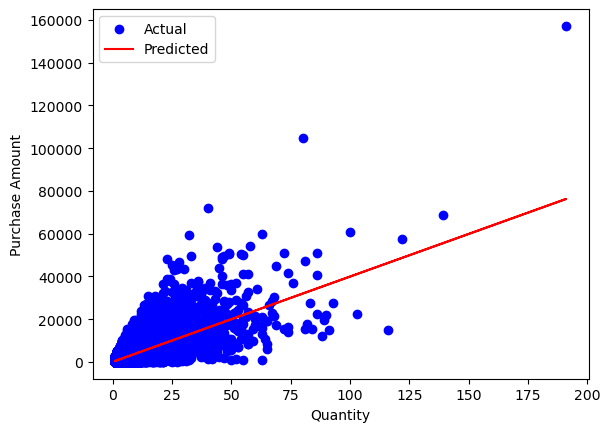

In [96]:
# Prepare the data
X = pa_data['Quantity'].values.reshape(-1, 1)
y = pa_data['Purchase_Amount'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(X)

# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()


In [101]:
# Get the coefficient and intercept
coefficient1 = model.coef_[0]
intercept = model.intercept_

# Construct the equation
equation = f"Purchase_Amount = {intercept:.2f} + {coefficient1:.2f} * Quantity"

# Print the equation
print("Linear Regression Equation:")
print(equation)


Linear Regression Equation:
Purchase_Amount = 39.91 + 398.88 * Quantity


In [102]:
# Example values for Quantity
quantity1 = 25
quantity2 = 40

# Calculate predicted Purchase_Amount using the equation
predicted_amount1 = intercept + coefficient1 * quantity1
predicted_amount2 = intercept + coefficient1 * quantity2

# Print the predicted Purchase_Amount
print("Predicted Purchase_Amount for Quantity", quantity1, ":", predicted_amount1)
print("Predicted Purchase_Amount for Quantity", quantity2, ":", predicted_amount2)


Predicted Purchase_Amount for Quantity 25 : 10011.973215346938
Predicted Purchase_Amount for Quantity 40 : 15995.209857941009


In [2]:
pa_data['Age'] = me_df.groupby('user_session')['Age'].first()
pa_data['Income'] = me_df.groupby('user_session')['Income'].first()


NameError: name 'me_df' is not defined

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare the data
X = pa_data[['Quantity', 'Age', 'Income']].values
y = pa_data['Purchase_Amount'].values

# Check for missing values
print("Missing values in X:", np.isnan(X).sum())
print("Missing values in y:", np.isnan(y).sum())

# Handle missing values
valid_mask = ~np.isnan(X).any(axis=1)
X = X[valid_mask]
y = y[valid_mask]

# Check if any samples remain
if X.shape[0] == 0:
    print("No samples remaining after handling missing values. Please check your data.")
    exit()

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(X)

# Visualize the results
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()


NameError: name 'pa_data' is not defined